# Load Data

In [91]:
# Read about the dataset here https://samyzaf.com/ML/song_year/song_year.html

# Setting the figure size to a bigger one than the default
from matplotlib import rcParams
rcParams['figure.figsize'] = (10, 6)
rcParams['legend.fontsize'] = 16
rcParams['axes.labelsize'] = 16
import pandas as pd


# Load the data from the file
data = pd.read_csv('/Users/ignaciopastorebenaim/Documents/MGRCV/TPs/ML/Lab1/data/YearPredictionMSD.csv')

X = data.to_numpy()[:,1:]
y = data.to_numpy()[:,0]

features = ['year', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10', 't11', 't12', 't13', 't14', 't15', 't16', 't17', 't18', 't1 9', 't20', 't21', 't22', 't23', 't24', 't25', 't26', 't27', 't28', 't29', 't30', 't31', 't32', 't33', 't34', 't35', 't36 ', 't37', 't38', 't39', 't40', 't41', 't42', 't43', 't44', 't45', 't46', 't47', 't48', 't49', 't50', 't51', 't52', 't53' , 't54', 't55', 't56', 't57', 't58', 't59', 't60', 't61', 't62', 't63', 't64', 't65', 't66', 't67', 't68', 't69', 't70', 't71', 't72', 't73', 't74', 't75', 't76', 't77', 't78', 't79', 't80', 't81', 't82', 't83', 't84', 't85', 't86', 't87', 't88', 't89', 't90']

# Load the data from the file
data = pd.read_csv('/Users/ignaciopastorebenaim/Documents/MGRCV/TPs/ML/Lab1/data/YearPredictionMSD.csv'
                  , names=features
                   )

# Visualize and first glance

Head:     year        t1        t2        t3        t4        t5        t6        t7  \
0     0   1.00000   2.00000   3.00000   4.00000   5.00000   6.00000   7.00000   
1  2001  49.94357  21.47114  73.07750   8.74861 -17.40628 -13.09905 -25.01202   
2  2001  48.73215  18.42930  70.32679  12.94636 -10.32437 -24.83777   8.76630   
3  2001  50.95714  31.85602  55.81851  13.41693  -6.57898 -18.54940  -3.27872   
4  2001  48.24750  -1.89837  36.29772   2.58776   0.97170 -26.21683   5.05097   
5  2001  50.97020  42.20998  67.09964   8.46791 -15.85279 -16.81409 -12.48207   
6  2001  50.54767   0.31568  92.35066  22.38696 -25.51870 -19.04928  20.67345   
7  2001  50.57546  33.17843  50.53517  11.55217 -27.24764  -8.78206 -12.04282   
8  2001  48.26892   8.97526  75.23158  24.04945 -16.02105 -14.09491   8.11871   
9  2001  49.75468  33.99581  56.73846   2.89581  -2.92429 -26.44413   1.71392   

         t8        t9  
0   8.00000   9.00000  
1 -12.23257   7.83089  
2  -0.92019  18.76548  
3  -2

Text(0, 0.5, 'Number of songs')

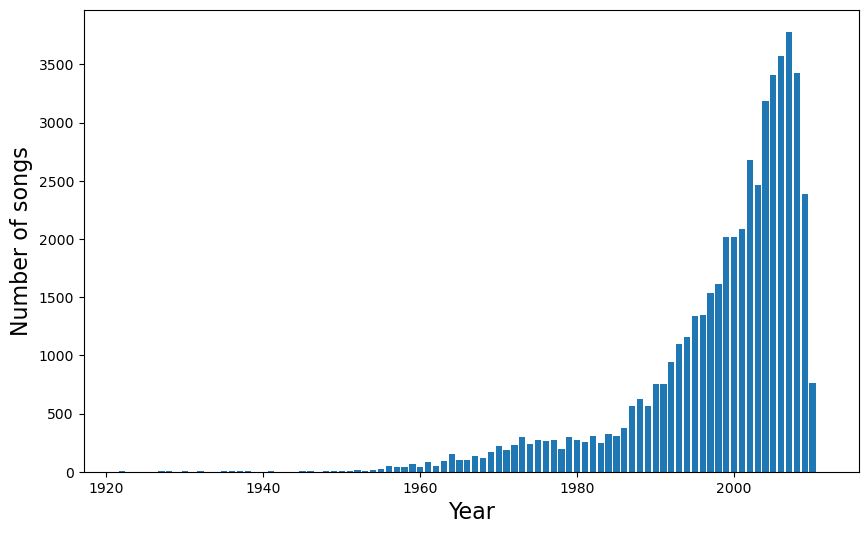

In [92]:
import matplotlib.pyplot as plt

print("Head: ", data.iloc[:, :10].head(10))
print("Data Shape: ", data.shape)
print("X Shape: ", X.shape)
print("y Shape: ", y.shape)


#Number of songs per year
nsongs = {}
for i in range(1922,2012):
    nsongs[i] = len(data[data.year==i])
years = range(1922,2012)
values = [nsongs[i] for i in years]

#Bar plot
plt.bar(years, values, align='center')
plt.xlabel("Year")
plt.ylabel("Number of songs")



# Split in Train, validate and test

In [93]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# # Ensure y is a 1-dimensional array
# y = data['year'].values


# split the data in training, validation and test sets
X_train_and_val, X_test, y_train_and_val, y_test = train_test_split(X, y, test_size = 0.1, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X_train_and_val, y_train_and_val, test_size = 0.1, random_state=7)

print('# training samples: ', X_train.shape[0])
print('# validation samples: ', X_val.shape[0])
print('# test samples: ', X_test.shape[0])

# training samples:  40500
# validation samples:  4500
# test samples:  5000


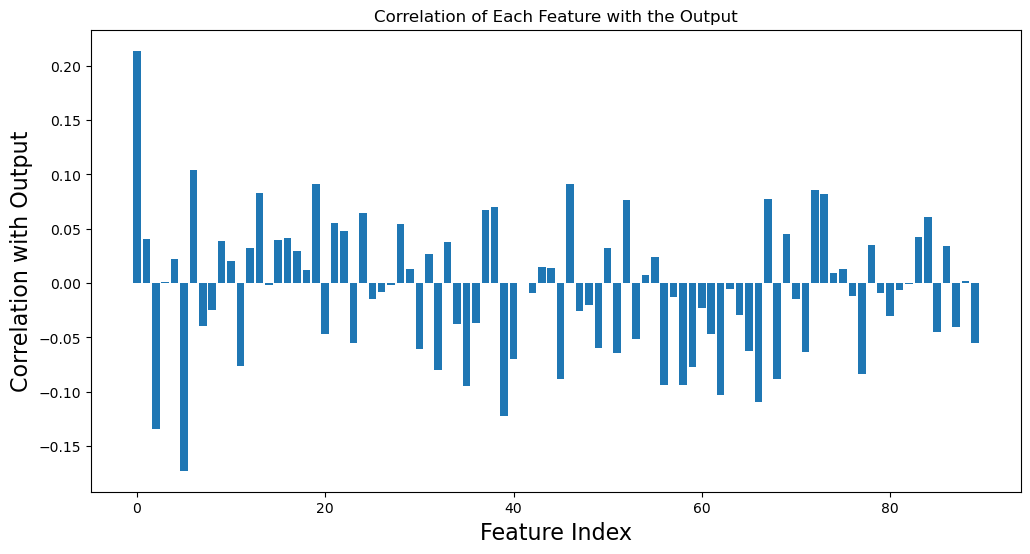

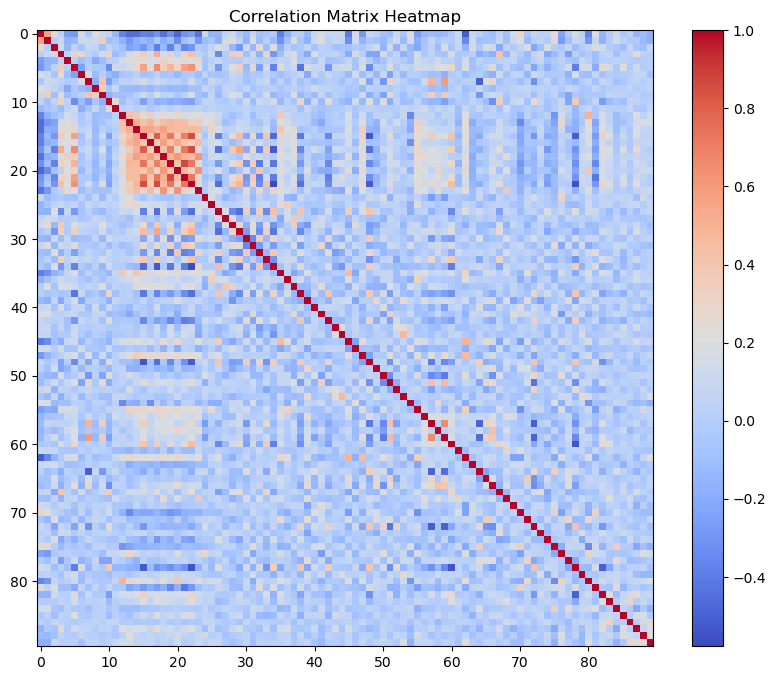

In [94]:
from scipy.stats import pearsonr
import numpy as np


# Compute the correlation between each feature in X_train and y_train
correlations = []
for i in range(X_train.shape[1]):
  corr, _ = pearsonr(X_train[:, i], y_train)
  correlations.append(corr)


# Plot the correlations
plt.figure(figsize=(12, 6))
plt.bar(range(len(correlations)), correlations)
plt.xlabel('Feature Index')
plt.ylabel('Correlation with Output')
plt.title('Correlation of Each Feature with the Output')
plt.show()

# Compute the correlation matrix
corr_matrix = np.corrcoef(X_train, rowvar=False)

# Plot the heatmap
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title('Correlation Matrix Heatmap')
plt.show()



# KNN

In [97]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score 
from sklearn import neighbors

# For several ks in knn
for n_neighbors in [1, 5, 10, 15,20]:
    
    # Fit a knn model
    knn = neighbors.KNeighborsRegressor(n_neighbors)
    knn.fit(X_train, y_train)
    
    # Make predictions using the training and test data
    # y_train_predicted = knn.predict(X_train)
    y_val_predicted = knn.predict(X_val)
    # rmse_train = mean_squared_error(y_train, y_train_predicted)
    mse_val = mean_squared_error(y_val, y_val_predicted)
    
    # Plot the data and the model
    # print('MSE (training set): {}'.format(mse_train))
    print('MSE (validation set): {}'.format(mse_val))
    # Calculate R2 and explained variance
    # r2_train = r2_score(y_train, y_train_predicted)
    r2_val = r2_score(y_val, y_val_predicted)
    # ev_train = explained_variance_score(y_train, y_train_predicted)
    ev_val = explained_variance_score(y_val, y_val_predicted)
    # print('R2 (training set): {}'.format(r2_train))
    print('R2 (validation set): {}'.format(r2_val))
    # print('Explained variance (training set): {}'.format(ev_train))
    print('Explained variance (validation set): {}'.format(ev_val))
    


MSE (validation set): 166.2788888888889
R2 (validation set): -0.5111299939682972
Explained variance (validation set): -0.5110876962991866
MSE (validation set): 108.03057777777775
R2 (validation set): 0.018226261694526236
Explained variance (validation set): 0.018267084454070992
MSE (validation set): 100.46185333333332
R2 (validation set): 0.08701025827104703
Explained variance (validation set): 0.08702721851933082
MSE (validation set): 99.01802567901235
R2 (validation set): 0.1001316550349094
Explained variance (validation set): 0.10015962943684076
MSE (validation set): 99.37562111111112
R2 (validation set): 0.09688185473397293
Explained variance (validation set): 0.09689164513936688


Filtered correlations:  [ 0.2138639  -0.13378628 -0.1726307   0.10369488 -0.12262817 -0.10302805
 -0.10940603]
Filtered indexes:  [ 0  2  5  6 39 62 66]


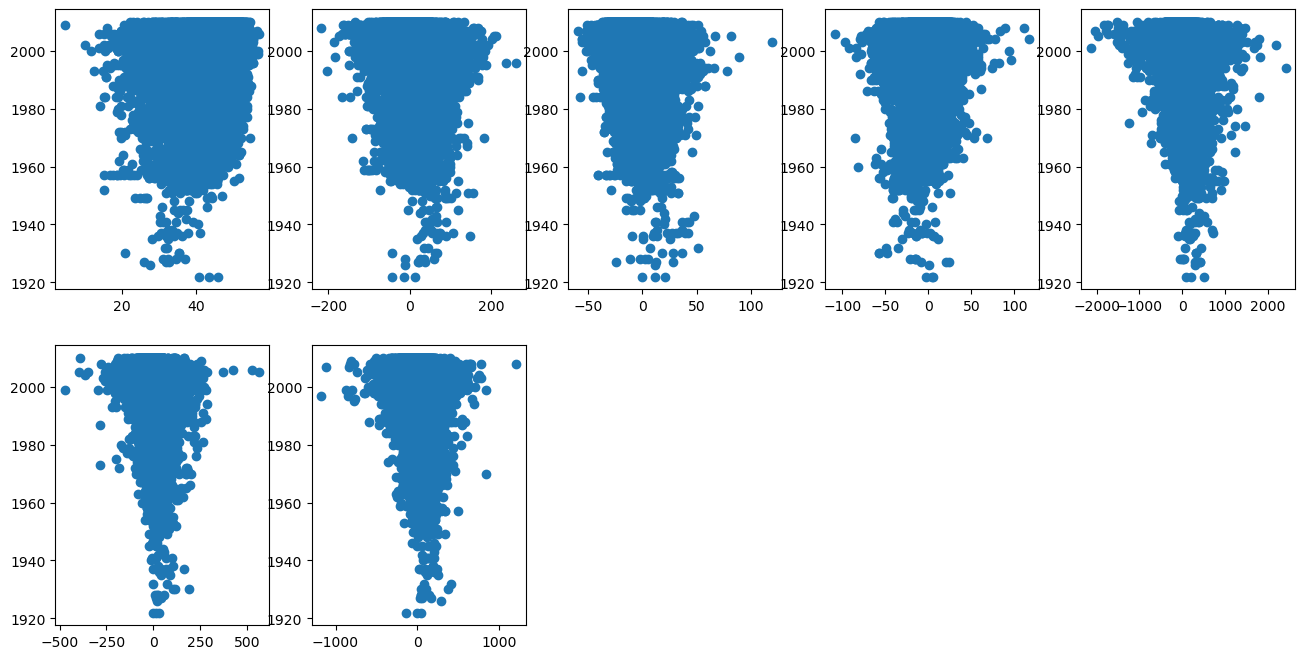

In [96]:
# Convert the list to a numpy array for easier handling
correlations = np.array(correlations)

# Filter correlations with a threshold of 0.1
threshold = 0.1
filtered_indices = np.where(np.abs(correlations) >= threshold)[0]
filtered_correlations = correlations[filtered_indices]

print("Filtered correlations: ", filtered_correlations)
print("Filtered indexes: ", filtered_indices)


plt.figure(figsize=(16, 8))
for i, feature_index in enumerate(filtered_indices):
  plt.subplot(2, 5, i+1)
  plt.scatter(X_train[:,feature_index],y_train)

In [99]:
from sklearn import neighbors

# For several ks in knn
for n_neighbors in [1, 5, 10, 15,20]:
    
    # Fit a knn model
    knn = neighbors.KNeighborsRegressor(n_neighbors)
    knn.fit(X_train[:,filtered_indices], y_train)
    
    # Make predictions using the training and test data
    # y_train_predicted = knn.predict(X_train)
    y_val_predicted = knn.predict(X_val[:,filtered_indices])
    # rmse_train = mean_squared_error(y_train, y_train_predicted)
    mse_val = mean_squared_error(y_val, y_val_predicted)
    
    # Plot the data and the model
    # print('MSE (training set): {}'.format(mse_train))
    print('MSE (validation set): {}'.format(mse_val))
    # Calculate R2 and explained variance
    # r2_train = r2_score(y_train, y_train_predicted)
    r2_val = r2_score(y_val, y_val_predicted)
    # ev_train = explained_variance_score(y_train, y_train_predicted)
    ev_val = explained_variance_score(y_val, y_val_predicted)
    # print('R2 (training set): {}'.format(r2_train))
    print('R2 (validation set): {}'.format(r2_val))
    # print('Explained variance (training set): {}'.format(ev_train))
    print('Explained variance (validation set): {}'.format(ev_val))

MSE (validation set): 187.96666666666667
R2 (validation set): -0.7082268817422992
Explained variance (validation set): -0.7081797699415107
MSE (validation set): 115.40850666666667
R2 (validation set): -0.04882379927151281
Explained variance (validation set): -0.048822194393406626
MSE (validation set): 105.70814666666665
R2 (validation set): 0.039332340369794716
Explained variance (validation set): 0.039348134850534344
MSE (validation set): 102.27114666666671
R2 (validation set): 0.07056753699622575
Explained variance (validation set): 0.07056808885589305
MSE (validation set): 100.87738666666672
R2 (validation set): 0.08323392269598007
Explained variance (validation set): 0.0832432545987517


In [107]:
# Fit a linear regression model
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
# Predict output for the validation data
y_val_predicted = lr.predict(X_val)
print('Linear model')
# Compute metrics in the validation data
mse_val = mean_squared_error(y_val, y_val_predicted)
print('MSE (validation set): {}'.format(mse_val))
r2_val = r2_score(y_val, y_val_predicted)
print('R2 (validation set): {}'.format(r2_val))
# ev_val = explained_variance_score(y_val, y_val_predicted)
# print('Explained variance (validation set): {}'.format(ev_val))
# Print the model coefficients
# print('Model coefficients: ', lr.coef_)


### TOO MUCH ITERATIONS
# # Fit a Huber regression model
# hu = linear_model.HuberRegressor(max_iter=10000)
# hu.fit(X_train, y_train)
# # Predict output for the validation data
# y_val_predicted = hu.predict(X_val)
# print('Huber model')
# # Compute metrics in the validation data
# mse_val = mean_squared_error(y_val, y_val_predicted)
# print('MSE (validation set): {}'.format(mse_val))
# r2_val = r2_score(y_val, y_val_predicted)
# print('R2 (validation set): {}'.format(r2_val))
# # ev_val = explained_variance_score(y_val, y_val_predicted)
# # print('Explained variance (validation set): {}'.format(ev_val))
# # Print the model coefficients
# # print('Model coefficients: ', lr.coef_)

# Fit a RANSAC regression model
ra = linear_model.RANSACRegressor()
ra.fit(X_train, y_train)
# Predict output for the validation data
y_val_predicted = ra.predict(X_val)
print('RANSAC model')
# Compute metrics in the validation data
mse_val = mean_squared_error(y_val, y_val_predicted)
print('MSE (validation set): {}'.format(mse_val))
r2_val = r2_score(y_val, y_val_predicted)
print('R2 (validation set): {}'.format(r2_val))
# ev_val = explained_variance_score(y_val, y_val_predicted)
# print('Explained variance (validation set): {}'.format(ev_val))
# Print the model coefficients
# print('Model coefficients: ', lr.coef_)


Linear model
MSE (validation set): 86.32598642601543
R2 (validation set): 0.2154759499600617
RANSAC model
MSE (validation set): 2659.975171711192
R2 (validation set): -23.173653625203833
